
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### General

> The dataset that i will be analysing is that of the information about 10,000 movies collected from The Movie DataBase(TMDB). The data consist of informations which include; Movie id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview,bruntime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj and revenue_adj.

#### Understanding the Data

- id: The ID of the movie.
- imdb_id: The Internet Movie Database ID
- popularity: The Popularity Score assigned by TMDB.
- budget: The budget of the movie in dollars.
- revenue: The total revenue of the movie in dollars.
- original_title: The original title of the movie.
- cast: A stringified list of cast in the movie.
- homepage: The Official Homepage of the move.
- director: The movie director.
- tagline: The tagline of the movie.
- keywords: words or phrases that describe motifs, themes, character types, or plot details
- overview: A brief blurb of the movie.
- runtime: The runtime of the movie in minutes.
- genres: A stringified list of dictionaries that list out all the genres associated with the movie.
- production_companies: A stringified list of production companies involved with the making of the movie.
- release_date: Theatrical Release Date of the movie.
- vote_count: The number of votes by users, as counted by TMDB.
- vote_average: The average rating of the movie.
- release_year: Theatrical Release Year of the movie.
- budget_adj: The budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
- revenue_adj: The revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


#### Aim and Objectives
>In this project, i will be analysing data about movies. In particular, I will be interested in finding factors that makes movies get high ratings and how they differ from movies with low ratings. Specifically, I will be looking for trends in what genres, casts, directors, months, are associated with high and low ratings movies and if ratings affect both budget and revenue. I will also be exploring the cast that are involved in popular and non popular movies.


#### Import Packages

In [129]:
# import statements for all of the packages that i plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Check for;

- inconsistent data types
- nulls and incoherent values
- non-discriptive column headings
- duplicates

### General Properties

In [130]:
# Load data and print out a few lines to perform visualy inspection.
movie_data = pd.read_csv('tmdb-movies.csv')
pd.set_option('display.max_columns', None)
movie_data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [131]:
#   check column types and null values
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [132]:
# check the ststistical repreentation of data
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [133]:
# check for column name that is inconsistence with the variable they represent
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [134]:
# check for number of null values in each column
movie_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [135]:
#check for zero values
movie_data.apply(lambda x: sum(x==0),axis=0)

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [136]:
# Check duplicated rows
movie_data.duplicated().sum()

1

In [137]:
#Examine data types for some selected columns (columns with object data type)
type(movie_data.genres[0])

str

In [138]:
#Examine data types for cast
type(movie_data.cast[0])

str

In [139]:
#Examine data types for production_companies
type(movie_data.production_companies[0])

str

In [140]:
#Examine data types for director
type(movie_data.director[0])

str

In [141]:
#Examine data types for release_date
type(movie_data.release_date[0])

str

In [142]:
# check for pipe character in genres
movie_data.genres.str.contains('|').sum()

10843

In [143]:
# check for pipe character in cast
movie_data.cast.str.contains('|').sum()

10790

In [144]:
# check for pipe characters in production_companies column
movie_data.production_companies.str.contains('|').sum()

9836

In [145]:
# check for pipe characters in director column
movie_data.director.str.contains('|').sum()

10822


### Data Cleaning

- drop columns not needed in analysis
- remove diplicates
- change release_date to datetime
- replace unnecessary characters in cast, production_companies, and genre
- change data type for cast, production_companies, and genre to series/list
- drop rows with zero value of budget_adj and revenue_adj
- add profit column
- add release month column
- rename vote_average as ratings

In [146]:
#Make a duplicate of data for cleaning
movie_clean = movie_data.copy()

In [147]:
# drop unneeded columns
movie_clean.drop(['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [148]:
# drop null rows
movie_clean.dropna(inplace=True)
movie_clean.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [149]:
#drop duplicates rows
movie_clean.drop_duplicates(inplace=True)
movie_clean.duplicated().sum()

0

In [150]:
#change release date to datetime
movie_clean['release_date'] = pd.to_datetime(movie_clean['release_date'])
type(movie_clean['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [151]:
# replace pipe(|) seperator in genre with comma and convert to list
movie_clean.genres = movie_clean.genres.str.replace('|', ',', regex=True)
movie_clean.genres = movie_clean.genres.str.split(',')
movie_clean.genres[0]

['Action', 'Adventure', 'Science Fiction', 'Thriller']

In [152]:
type(movie_clean.genres[0])

list

In [153]:
# replace pipe(|) seperator in director with comma and convert to list
movie_clean.director = movie_clean.director.str.replace('|', ',', regex=True)
movie_clean.director = movie_clean.director.str.split(',')
movie_clean.director[0]

['Colin Trevorrow']

In [154]:
type(movie_clean.genres[0])

list

In [155]:
# replace pipe(|) seperator in cast with comma and convert to list
movie_clean.cast = movie_clean.cast.str.replace('|', ',', regex=True)
movie_clean.cast = movie_clean.cast.str.split(',')
movie_clean.cast[3]

['Harrison Ford',
 'Mark Hamill',
 'Carrie Fisher',
 'Adam Driver',
 'Daisy Ridley']

In [156]:
type(movie_clean.genres[0])

list

In [157]:
# replace pipe(|) seperator in production companies with comma and convert to list
movie_clean.production_companies = movie_clean.production_companies.str.replace('|', ',', regex=True)
movie_clean.production_companies = movie_clean.production_companies.str.split(',')
movie_clean.production_companies[3]

['Lucasfilm', 'Truenorth Productions', 'Bad Robot']

In [158]:
type(movie_clean.production_companies[0])

list

In [159]:
# drop rows with zero budget and revenue
movie_clean = movie_clean[movie_clean.budget_adj > 0]
movie_clean = movie_clean[movie_clean.revenue_adj > 0]
movie_clean.query('budget_adj<0 or revenue_adj<0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [160]:
#append profit column
movie_clean['profit_adj'] = movie_clean['revenue_adj']-movie_clean['budget_adj']

In [161]:
#append release month column
movie_clean['release_month'] = movie_clean['release_date'].dt.month_name()
movie_clean['release_month'].head(5)

0        June
1         May
2       March
3    December
4       April
Name: release_month, dtype: object

In [162]:
#change vote average to ratings
movie_clean.rename(columns={'vote_average':'ratings'}, inplace=True)
movie_clean.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'ratings', 'release_year', 'budget_adj', 'revenue_adj',
       'profit_adj', 'release_month'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis
1. What amount of budget is needed for high and low rating movies.
2. Do ratings idicate the amount of revenue generated from a movie.
3. Do ratings idicate the amount of profit generated from a movie.
4. Which casts are associated with high and low ratings movies.
6. Which directors are associated with high and low rating movies.
7. Which release months are associated with high profit movies.
7. Which casts are associated with popular movies.

### 1. Do higher budget movies get high ratings

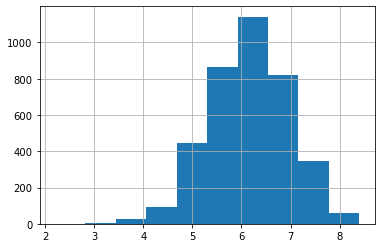

In [163]:
# Check the visual distribution of movie rating.
movie_clean.ratings.hist();

In [164]:
# Get the median movie ratings
movie_clean.ratings.describe()

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: ratings, dtype: float64

In [165]:
#Select movies with ratings less than the median 
low_ratings = movie_clean[movie_clean.ratings<6.1]
low_ratings.ratings.describe()

count    1622.000000
mean        5.440012
std         0.501357
min         2.200000
25%         5.200000
50%         5.600000
75%         5.800000
max         6.000000
Name: ratings, dtype: float64

In [166]:
#Select movies with ratings greater than or equal to the median
high_ratings = movie_clean[movie_clean.ratings>=6.1]
high_ratings.ratings.describe()

count    2183.000000
mean        6.713376
std         0.465299
min         6.100000
25%         6.300000
50%         6.600000
75%         7.000000
max         8.400000
Name: ratings, dtype: float64

In [167]:
#Ensure each movies is included
total_movies = movie_clean.shape[0]
total_movies == low_ratings['budget_adj'].count() + high_ratings['budget_adj'].count()

True

In [168]:
#Get the mean budget for low and high ratings
print(high_ratings['budget_adj'].mean(), low_ratings['budget_adj'].mean())

45420914.02031747 43776110.748022325


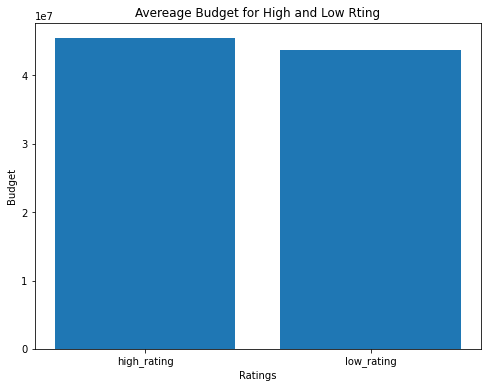

In [169]:
fig = plt.figure(figsize = (8, 6))
plt.bar(['high_rating', 'low_rating'], [high_ratings['budget_adj'].mean(), low_ratings['budget_adj'].mean()])
plt.title("Avereage Budget for High and Low Rting")
plt.xlabel("Ratings")
plt.ylabel("Budget");

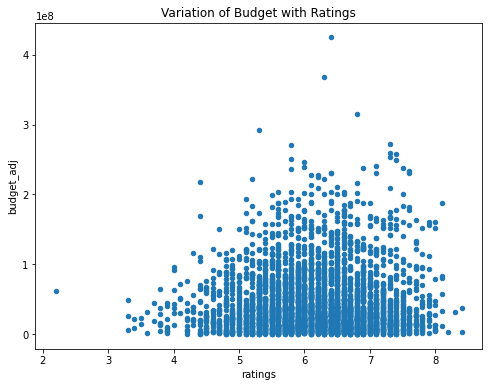

In [170]:
#Plot the scatter chart to show budget variation with rating
movie_clean.plot(x='ratings', y='budget_adj', kind='scatter', figsize= (8,6), title="Variation of Budget with Ratings");

### 2. Do movies with high ratings get high revenue?

In [171]:
#Get the mean revenue for low and high ratings
print(high_ratings['revenue_adj'].mean(), low_ratings['revenue_adj'].mean())

175614247.58265528 89055627.44388954


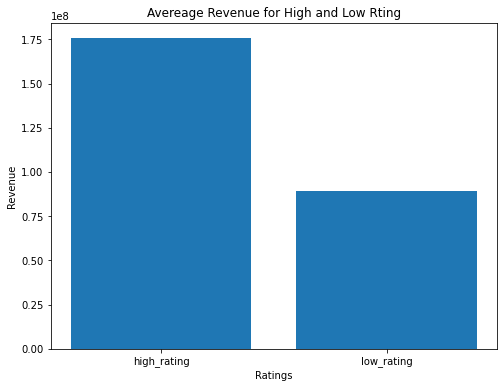

In [172]:
#Plot the bar graph to show mean Revenue variation with rating
fig = plt.figure(figsize = (8, 6))
plt.bar(['high_rating', 'low_rating'], [high_ratings['revenue_adj'].mean(), low_ratings['revenue_adj'].mean()])
plt.title("Avereage Revenue for High and Low Rting")
plt.xlabel("Ratings")
plt.ylabel("Revenue");

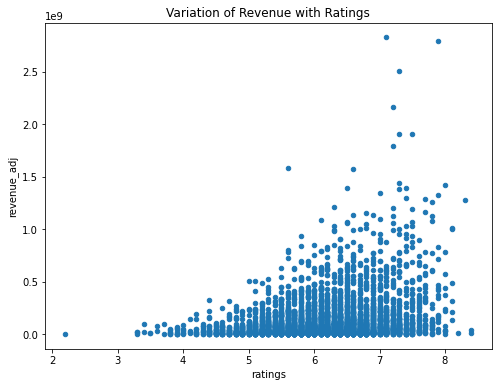

In [173]:
#Plot the scatter chart to show revenue variation with rating
movie_clean.plot(x='ratings', y='revenue_adj', kind='scatter', figsize= (8,6), title="Variation of Revenue with Ratings");

### 3. Do movies with high ratings make high profit?

In [174]:
#Get the mean profit for low and high ratings
print(high_ratings['profit_adj'].mean(), low_ratings['profit_adj'].mean())

130193333.56233773 45279516.69586732


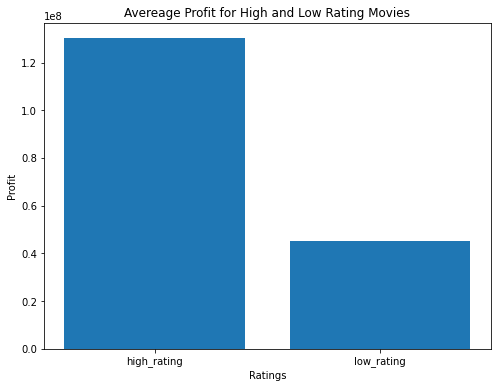

In [175]:
#Plot the bar graph to show mean profit variation with rating
fig = plt.figure(figsize = (8, 6))
plt.bar(['high_rating', 'low_rating'], [high_ratings['profit_adj'].mean(), low_ratings['profit_adj'].mean()])
plt.title("Avereage Profit for High and Low Rating Movies")
plt.xlabel("Ratings")
plt.ylabel("Profit");

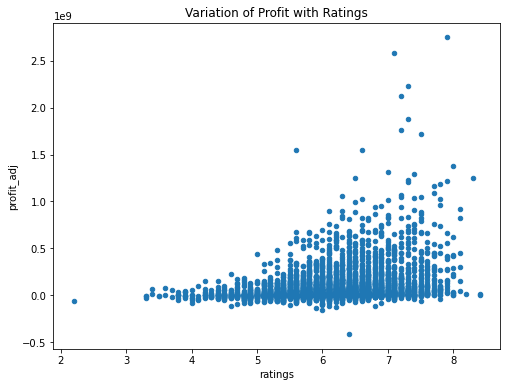

In [176]:
#Plot the scatter chart to show profit variation with rating
movie_clean.plot(x='ratings', y='profit_adj',figsize= (8,6), kind='scatter', title="Variation of Profit with Ratings");

### 4.  Which artist are associated with high rating movies?

In [177]:
# artist that are casted in high rating movie
cast_highratings = high_ratings.explode('cast')
cast_highratings['cast'].value_counts()

Robert De Niro       35
Brad Pitt            30
Tom Hanks            29
Denzel Washington    27
Johnny Depp          27
                     ..
Lars Ulrich           1
Kirk Hammett          1
Hugh Dancy            1
Paul Pape             1
Raquel Welch          1
Name: cast, Length: 4690, dtype: int64

In [178]:
# artist that are casted in low rating movie
cast_lowratings = low_ratings.explode('cast')
cast_lowratings['cast'].value_counts()

Nicolas Cage             26
Bruce Willis             26
Eddie Murphy             23
Arnold Schwarzenegger    19
Samuel L. Jackson        19
                         ..
Michael Burstin           1
Romeo Miller              1
Catherine Kresge          1
Larenz Tate               1
Simon Chandler            1
Name: cast, Length: 3965, dtype: int64

### 5.  Which directors are associated with high rating movies?

In [179]:
# directors that are involved in high rating movies
director_highratings = high_ratings.explode('director')
director_highratings['director'].value_counts()

Steven Spielberg     23
Clint Eastwood       19
Martin Scorsese      17
Woody Allen          16
Ridley Scott         16
                     ..
Robin Budd            1
Donovan Cook          1
Charles Stone III     1
Kevin Bray            1
Howard Hawks          1
Name: director, Length: 1107, dtype: int64

In [180]:
# directors that are involved in low rating movies
director_lowratings = low_ratings.explode('director')
director_lowratings['director'].value_counts()

Peter Farrelly        10
Wes Craven             9
Bobby Farrelly         9
Paul W.S. Anderson     8
Raja Gosnell           8
                      ..
Mike Disa              1
Jim Sheridan           1
Dermot Mulroney        1
Oren Moverman          1
George Stevens         1
Name: director, Length: 1097, dtype: int64

### 6. In what months are high profitable movies mostly released?

In [181]:
# average Profit per month
monthly_profits = movie_clean.groupby('release_month')['profit_adj'].mean()
# arrange in ascending order of month
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_profits = monthly_profits.reindex(new_order, axis=0)
monthly_profits

release_month
January      4.679893e+07
February     4.878034e+07
March        9.040598e+07
April        7.270827e+07
May          1.461775e+08
June         1.671902e+08
July         1.247465e+08
August       5.434500e+07
September    3.652624e+07
October      6.454562e+07
November     1.297688e+08
December     1.375084e+08
Name: profit_adj, dtype: float64

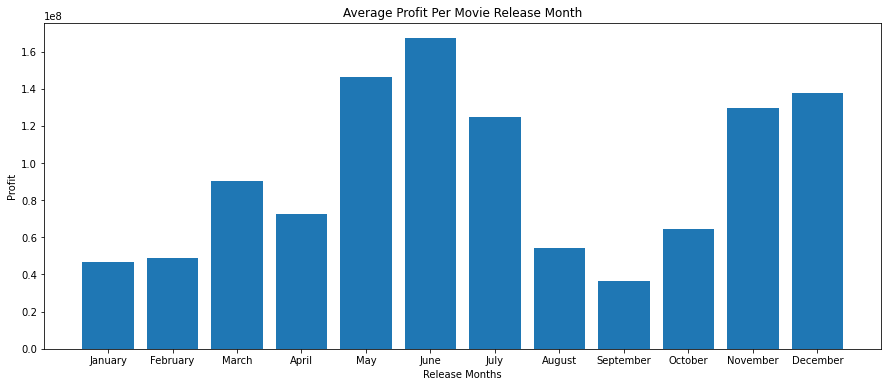

In [182]:
# bar graph to show mean profit variation with release month
plt.subplots(figsize=(15, 6))
plt.bar(monthly_profits.index, monthly_profits)
plt.title('Average Profit Per Movie Release Month')
plt.xlabel('Release Months')
plt.ylabel('Profit');

### 7.  Which casts are associated with popular movies.

In [183]:
#Get the median movie popularity
movie_clean.popularity.describe()

count    3805.000000
mean        1.203784
std         1.480569
min         0.010335
25%         0.470651
50%         0.810805
75%         1.387163
max        32.985763
Name: popularity, dtype: float64

In [184]:
#select movies that are less than the median popularity
unpopular_movies = movie_clean[movie_clean.popularity<0.81]
unpopular_movies.popularity.describe()

count    1902.000000
mean        0.466908
std         0.195378
min         0.010335
25%         0.313101
50%         0.470640
75%         0.626663
max         0.809646
Name: popularity, dtype: float64

In [185]:
#select movies that are greater than or equal to the median popularity
popular_movies = movie_clean[movie_clean.popularity>=0.81]
popular_movies.popularity.describe()

count    1903.000000
mean        1.940274
std         1.805638
min         0.810805
25%         1.049916
50%         1.387163
75%         2.163401
max        32.985763
Name: popularity, dtype: float64

In [186]:
#ensure each movies is included
total_movies = movie_clean.shape[0]
total_movies == unpopular_movies['popularity'].count() + popular_movies['popularity'].count()

True

In [187]:
#popular cast
popular_cast = popular_movies.explode('cast')
popular_cast.cast.value_counts().head(10)

Robert De Niro           34
Brad Pitt                28
Tom Cruise               27
Tom Hanks                26
Johnny Depp              26
Nicolas Cage             26
Bruce Willis             25
Matt Damon               25
Sylvester Stallone       25
Arnold Schwarzenegger    25
Name: cast, dtype: int64

In [188]:
#unpopular cast
unpopular_cast = unpopular_movies.explode('cast')
unpopular_cast.cast.value_counts().head(10)

Bruce Willis         21
Samuel L. Jackson    19
Robert De Niro       18
 Jr.                 18
Gene Hackman         18
Dennis Quaid         18
Julianne Moore       17
Nicolas Cage         17
Harrison Ford        16
Robert Duvall        15
Name: cast, dtype: int64

<a id='conclusions'></a>
## Conclusions

1. There is'nt any general relationship between budget and ratings. However from the analysis performed, movies with high rating tends to have slightly higher mean budget than movies with low ratings.


2. On average a movie with high ratings generated higher revenue compared to a movie wiith low ratings.


3. On average a movie with high ratings generated higher Profit compared to a movie wiith low ratings.


4. Robert De Niro, Brad Pitt, Tom Hanks, Denzel Washington, Johnny Depp are mostly casted in high rating movies while Nicolas Cage, Bruce Willis, Eddie Murphy, Arnold Schwarzenegger, Samuel L. Jackson are mostly casted in low rating movies.


5. Steven Spielberg, Clint Eastwood, Martin Scorsese, Woody Allen, Ridley Scott are the directors that are often involved in production of high ratings movies while Wes Craven, Renny Harlin, Bobby Farrelly, Peter Farrelly, Paul W.S. Anderson, Peter Hyams are popular directors fr movies with low ratings.


6. May, June and December movies makes highest profit while January, February and september movies makes the least profit.


7. Robert De Niro, Brad Pitt, Tom Cruise, Tom Hanks, Johnny Depp, Nicolas Cage, Bruce Willis, Matt Damon, Sylvester Stallone, Arnold Schwarzenegger are mostly casted in popular movies while Bruce Willis, Samuel L. Jackson, Robert De Niro, Jr., Gene Hackman, Dennis Quaid and Julianne Moore are mostly casted in non popular movies.



## Limitations

1. Some movies have very low budget that is not reaseonable to produce a movie but aren't drop during the data cleaning process because dropping them will lead to a reduction in over 65% of our data which will be unreasonable for analysis. Moreover the minimum budget to produce a movie is not known which makes cleaning some of these data difficult.


2. Also, some movies have very low revenue that is not reaseonable but are'nt drop during the data cleaning process because dropping them will lead to a reduction in over 65% of our data which will be unreasonable for analysis. 


3. Several rows with null values of both budget and revenue where droped and aren't replace with mean budget or mean revenue because replacing them will adversely afffect our analysis. Meanwhile dropping that much rows might also affect our analysis.
 
